# Moving Averages
    Moving averages, or rolling means, are time-series filters that filter impulsive responses by averaging the set or window of observations. It uses window size concepts and finds the average of the continuous window slides for each period

In [1]:
#import needful libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#read dataset
sales_data = pd.read_csv('datasets/sales.csv')
sales_data.head()

,Time,Sales
0,01/01/17,271.5
1,01/02/17,151.4
2,01/03/17,188.6
3,01/04/17,124.8
4,01/05/17,185.8


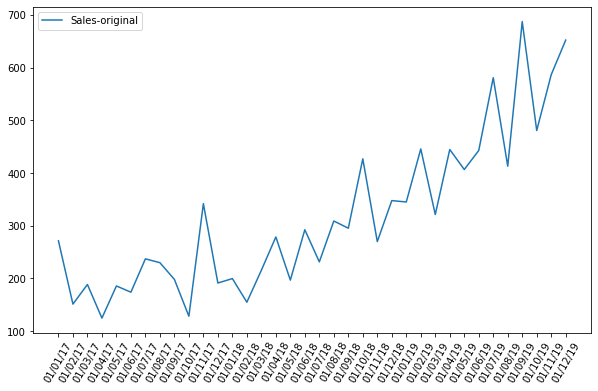

In [3]:
#setting figure size
plt.figure(figsize=(10,6))
plt.plot(sales_data['Time'], sales_data['Sales'], label="Sales-original")
#rotate x_label
plt.xticks(rotation=60)
#add legends
plt.legend()
plt.show()

In [4]:
#moving average with window 3
sales_data['3MA'] = sales_data['Sales'].rolling(window=3).mean()

In [5]:
#moving average with window 5
sales_data['5MA'] = sales_data['Sales'].rolling(window=5).mean()

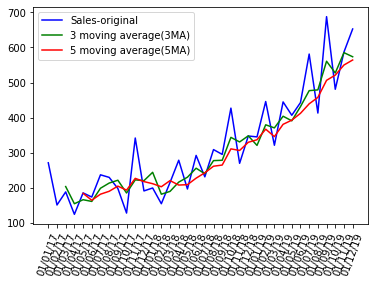

In [13]:
#plot original sales data
plt.plot(sales_data['Time'], sales_data['Sales'], label="Sales-original", color="blue")
#plot 3-moving average of sales data
plt.plot(sales_data['Time'], sales_data['3MA'], label = "3 moving average(3MA)", color="green")
#plot 5 moving average of sales data
plt.plot(sales_data['Time'], sales_data['5MA'], label = "5 moving average(5MA)", color="red")

#rotate xlabels
plt.xticks(rotation=70)

#add legends
plt.legend()

plt.show()


#Window functions
    The window function uses an interval for spectral analysis and filter design (for more background information, refer to http:/​/​en.​wikipedia.​org/​wiki/​Window_​function). The boxcar window is a rectangular window with the following formula:
w(n) = 1    
    In the pandas module, the DataFrame.rolling() function provides the same functionality using the win_type parameter for different window functions. Another parameter is the window for defining the size of the window, which is easy to set as shown in the previous section. Let's use the win_type parameter and try different window functions:


<AxesSubplot:xlabel='Time'>

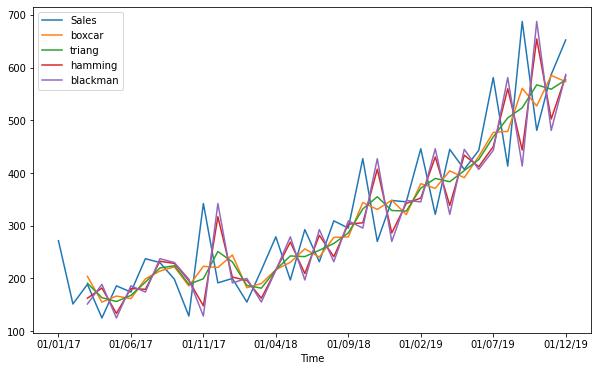

In [17]:
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt

sales_data = pd.read_csv('datasets/sales.csv', index_col ="Time")

#apply all the window on given dataframe
sales_data['boxcar']=sales_data.Sales.rolling(3, win_type='boxcar').mean()
sales_data['triang']=sales_data.Sales.rolling(3, win_type='triang').mean()
sales_data['hamming']=sales_data.Sales.rolling(3, win_type='hamming').mean()
sales_data['blackman']=sales_data.Sales.rolling(3, win_type='blackman').mean()

#plot rolling mean of all the window
sales_data.plot(kind='line', figsize=(10, 6))

# Defining cointegration
    Cointegration is just like a correlation that can be viewed as a superior metric to define the relatedness of two time series. Cointegration is the stationary behavior of the linear combination of two time series. In this way, the trend of the following equation must be stationary:
y(t) - a x(t)

    Consider a drunk man and his dog out on a walk. Correlation tells us whether they are going in the same direction. Cointegration tells us something about the distance over time between the man and his dog. We will show cointegration using randomly generated timeseries and real data. The Augmented Dickey-Fuller (ADF) test tests for a unit root in a time series and can be used to determine the stationarity of time series. 


In [18]:
import statsmodels.api as sm 
import pandas as pd 
import statsmodels.tsa.stattools as ts 
import numpy as np

#calculate ADF function
def calc_adf(x, y):
    result = sm.OLS(x, y).fit()
    return ts.adfuller(result.resid)

#read the dataset
data = sm.datasets.sunspots.load_pandas().data.values
N = len(data)

#generate sine wave and apply ADF test
t = np.linspace(-2 * np.pi, 2 * np.pi, N)
sine = np.sin(np.sin(t))
print("Self ADF", calc_adf(sine, sine))

Self ADF (-2.3248475274249956e-16, 0.958532086060056, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -21598.896016765088)


In the printed results, the first value represents the ADF metric and the second value represents the p-value. As you can see, the p-value is very high. The following values are the lag and sample size. The dictionary at the end gives the tdistribution values for this exact sample size. 

In [19]:
#apply adf test on sine and sine with noise
noise = np.random.normal(0, .01, N)
print("ADF sine with noise", calc_adf(sine, sine + noise))

ADF sine with noise (-17.563159811163835, 4.0868120779602814e-30, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -1854.292182896901)


The p-value has gone down considerably. The ADF metric here, -7.45, is lower than all the critical values in the dictionary. All these are strong arguments to reject cointegration

In [20]:
#apply adf test on sine and cosine with noise
cosine = 100 * np.cos(t) + 10

print("ADF sine vs cosine with noise", calc_adf(sine, cosine + noise))

ADF sine vs cosine with noise (-25.083262769729924, 0.0, 14, 294, {'1%': -3.452789844280995, '5%': -2.871421512222641, '10%': -2.5720351510944512}, -11878.86390005136)


In [21]:
print("Sine vs sunpoints", calc_adf(sine, data))

Sine vs sunpoints (-6.724269181070102, 3.4210811915549028e-09, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -1102.5867415291168)


# STL Decomposition
    STL stands for seasonal and trend decomposition using LOESS. STL is a time-series decomposition method that can decompose an observed signal into a trend, seasonality, and residual. It can estimate non-linear relationships and handle any type of seasonality. The statsmodels.tsa.seasonal subpackage offers the seasonal_decompose method for splitting a given input signal into trend, seasonality, and residual.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
#read datasets
data = pd.read_csv('datasets/beer_production.csv')
data.columns = ['date', 'data']

#change datatype to pandas datetime
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

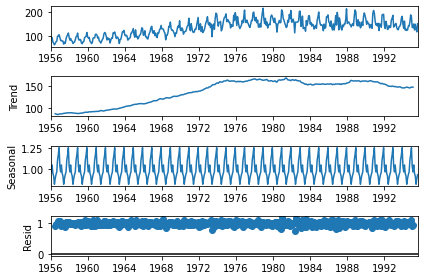

In [13]:
#decompose the data
decomposed_data = seasonal_decompose(data, model='multiplicative')

#plot decompose data
decomposed_data.plot()
plt.show()

#Autocorrelation
    Autocorrelation, or lagged correlation, is the correlation between a time series and its lagged series. It indicates the trend in the dataset. 

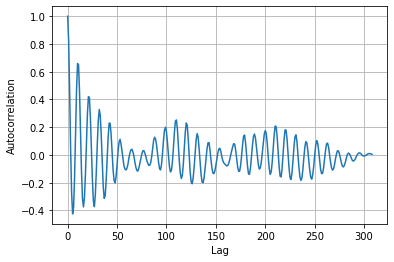

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#read the datasets
data = sm.datasets.sunspots.load_pandas().data

#calculate the autocorrelation using numpy
dy = data.SUNACTIVITY - np.mean(data.SUNACTIVITY)
dy_square = np.sum(dy ** 2)

#cross correlation
sun_correlated = np.correlate(dy, dy, mode='full')/dy_square
result = sun_correlated[int(len(sun_correlated)/2) :]

plt.plot(result)
plt.grid(True)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

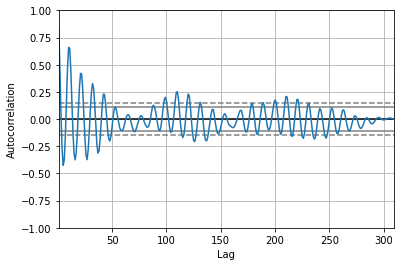

In [15]:
#plot autocorrelation with pandas plot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data.SUNACTIVITY)

# Autoregressive models
    Autoregressive models are time-series models used to predict future incidents

In [18]:
#import libraries and read datasets

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt

data = sm.datasets.sunspots.load_pandas().data

In [19]:
#split data into train test set
train_ratio = 0.8

train = data[:int(train_ratio*len(data))]
test = data[int(train_ratio*len(data)) :]

In [20]:
#train and fit the autoregressive model
ar_model = AR(train.SUNACTIVITY)
ar_model = ar_model.fit()

#print lags and
print("Number of Lag:", ar_model.k_ar)
print("Model Coefficients:\n", ar_model.params)

Number of Lag: 15
Model Coefficients:
 const              9.382322
L1.SUNACTIVITY     1.225684
L2.SUNACTIVITY    -0.512193
L3.SUNACTIVITY    -0.130695
L4.SUNACTIVITY     0.193492
L5.SUNACTIVITY    -0.168907
L6.SUNACTIVITY     0.054594
L7.SUNACTIVITY    -0.056725
L8.SUNACTIVITY     0.109404
L9.SUNACTIVITY     0.108993
L10.SUNACTIVITY   -0.117063
L11.SUNACTIVITY    0.200454
L12.SUNACTIVITY   -0.075111
L13.SUNACTIVITY   -0.114437
L14.SUNACTIVITY    0.177516
L15.SUNACTIVITY   -0.091978
dtype: float64


c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRE

In [21]:
#perform predictions and assess the model
start_point = len(train)
end_point = start_point + len(test) - 1
pred = ar_model.predict(start = start_point, end = end_point, dynamic=False)

#claculcate errors
mae = mean_absolute_error(test.SUNACTIVITY, pred)
mse = mean_squared_error(test.SUNACTIVITY, pred)
rmse = sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 31.178460983500457
MSE: 1776.946382616589
RMSE: 42.15384184883495


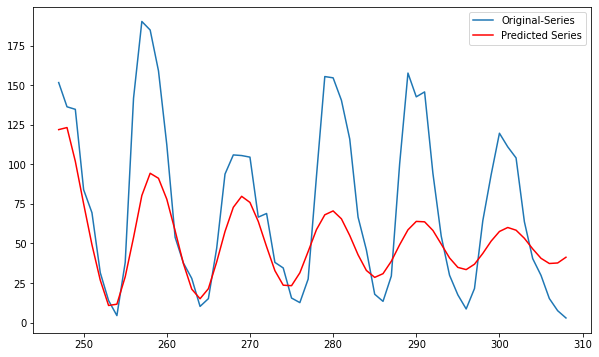

In [22]:
#setting figure size
plt.figure(figsize=(10, 6))

#plot test data
plt.plot(test.SUNACTIVITY, label="Original-Series")
#plot predictions
plt.plot(pred, color="red", label="Predicted Series")
#Add legends
plt.legend()
plt.show()

# Auto Regressive Moving Average models
    The ARMA model blends autoregression and moving averages. The ARMA model is commonly referred to as ARMA(p,q), 

In [26]:
#import libraries and read datasets

from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt

data = sm.datasets.sunspots.load_pandas().data
data.drop('YEAR',axis=1, inplace=True)

In [24]:
#split sunspot into train test sets
train_ratio = 0.8
train = data[:int(train_ratio * len(data))]
test = data[int(train_ratio * len(data)) :]

In [27]:
#train and fit the autoregressive model
arma_model = ARMA(train, order=(10, 1))
arma_model = arma_model.fit()

#make predictions
start_point = len(train)
end_point = start_point + len(test) -1
pred = arma_model.predict(start_point, end_point)

#calc errors
mae = mean_absolute_error(test.SUNACTIVITY, pred)
mse = mean_squared_error(test.SUNACTIVITY, pred)
rmse = sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("EMSE", rmse)

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


MAE: 33.954486540531974
MSE: 2041.3712230268677
EMSE 45.18153630662494


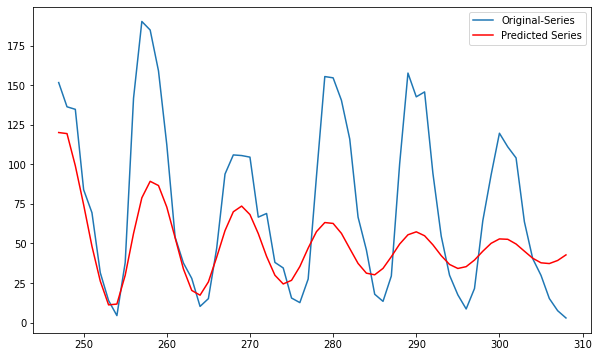

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(test, label="Original-Series")
plt.plot(pred, color='red', label='Predicted Series')
plt.legend()
plt.show()

 # Generating periodic Signals
    Many natural phenomena are regular and trustworthy, such as an accurate clock. Some phenomena exhibit patterns that seem regular. A group of scientists found three cycles in the sunspot activity with the Hilbert-Huang transform (see https:/​/​en.​wikipedia.​org/ wiki/​Hilbert%E2%80%93Huang_​transform). The cycles have a duration of 11, 22, and 100 years, approximately. Normally, we would simulate a periodic signal using trigonometric functions such as a sine function. You probably remember a bit of trigonometry from high school. That's all we need for this example. Since we have three cycles, it seems reasonable to create a model that is a linear combination of three sine functions. This just requires a tiny adjustment of the code for the autoregressive model: 

In [4]:
import numpy as np
import statsmodels.api as sm
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [5]:
#create model function
def model(p, t):
    C, p1, f1, phi1, p2, f2, phi2, p3, f3, phi3 = p
    return C + p1 * np.sin(f1 * t + phi1) + p2 * np.sin(f2 * t + phi2) + p3 * np.sin(f3 * t + phi3)

In [6]:
#create error function
def error(p, y, t):
    return y - model(p, t)

In [7]:
#create fit function
def fit(y, t):
    p0 = [y.mean(), 0, 2 * np.pi/11, 0, 0, 2 * np.pi/22, 0, 0, 2 * np.pi/100, 0]
    params = leastsq(error, p0, args=(y, t))[0]
    return params

In [8]:
#load datasets
data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

In [9]:
#apply and fit model
cutoff = int(.9 * len(sunspots))
params = fit(sunspots[: cutoff], years[: cutoff])
print("Params:", params)

pred = model(params, years[cutoff: ])
actual = sunspots[cutoff:]

Params: [ 47.18800156  28.89947466   0.56827281   6.51174621   4.55214731
   0.29372076 -14.3092358  -18.16524066   0.06574835  -4.37789397]


In [11]:

#print the results
print("Root mean square error", np.sqrt(np.mean((actual - pred) ** 2)))
print("Mean absolute error", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/actual))
mid = (actual + pred )/2
print("Symmetric Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination", 1 - ((actual - pred)**2).sum()/((actual - actual.mean()) ** 2).sum())

Root mean square error 59.561998882668405
Mean absolute error 44.58153216796476
Mean absolute percentage error 65.16433784785795
Symmetric Mean absolute percentage error 78.44793026938697
Coefficient of determination -0.36352893481513116


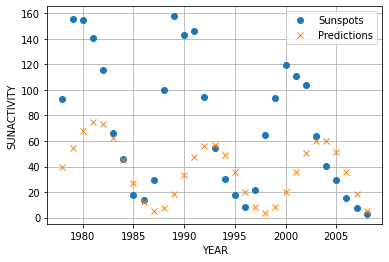

In [12]:
#plot the original and predicted series

year_range = data_loader.data['YEAR'].values[cutoff:]

#plot the actual and predicted data points
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Predictions")
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
plt.legend()
plt.show()

# Fourier Analysis
    Fourier analysis uses the Fourier series concept thought up by the mathematician Joseph Fourier. The Fourier series is a mathematical method used to represent functions as an infinite series of sine and cosine terms. The functions in question can be real- or complexvalued
    For Fourier analysis, the most competent algorithm is Fast Fourier Transform (FFT). FFT decomposes a signal into different frequency signals. This means it produces a frequency spectrum of a given signal. The SciPy and NumPy libraries provide functions for FFT. 
    The rfft() function performs FFT on real-valued data. We could also have used the fft() function, but it gives a warning on this Sunspot dataset. The fftshift() function moves the zero-frequency component to the middle of the spectrum. 

In [13]:
#import libraries ans red the datasets
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

data = sm.datasets.sunspots.load_pandas().data

#create sine wave
t = np.linspace(-2 * np.pi, 2 * np.pi, len(data.SUNACTIVITY.values))
mid = np.ptp(data.SUNACTIVITY.values)/2
sine = mid + mid * np.sin(np.sin(t))

In [14]:
#compute fft for sine wave
sine_fft = np.abs(fftshift(rfft(sine)))
print("Index of max sine FFT", np.argsort(sine_fft)[-5: ])

#compute fft for sunspots datasets
transformed = np.abs(fftshift(rfft(data.SUNACTIVITY.values)))
print("Indices of max sunspots FFT", np.argsort(transformed) [-5: ])


Index of max sine FFT [160 157 166 158 154]
Indices of max sunspots FFT [205 212 215 209 154]


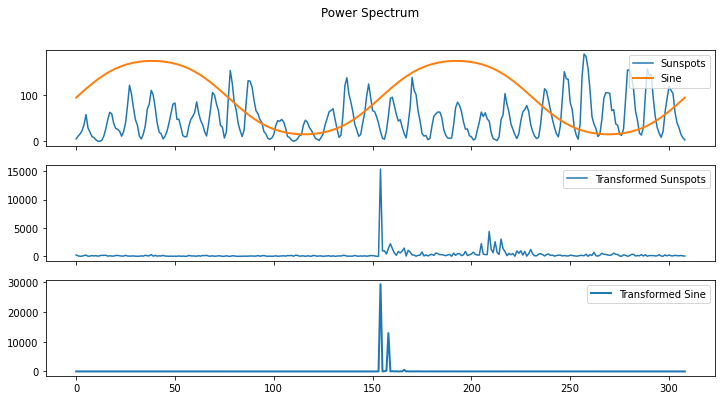

In [15]:
#create subplots
fig, axs = plt.subplots(3, figsize=(12, 6), sharex=True)
fig.suptitle('Power Spectrum')
axs[0].plot(data.SUNACTIVITY.values, label="Sunspots")
axs[0].plot(sine, lw=2, label="Sine")
axs[0].legend()
axs[1].plot(transformed, label="Transformed Sunspots")
axs[1].legend()
axs[2].plot(sine_fft, lw=2, label="Transformed Sine")
axs[2].legend()

# Spetral analysis filtering
    In the previous section, we discussed the amplitude spectrum of the dataset. Now is the time to explore the power spectrum. The power spectrum of any physical signal can display the energy distribution of the signal. We can easily change the code and display the power spectrum by squaring the transformed signal using the following syntax:
plt.plot(transformed ** 2, label="Power Spectrum") 
    We can also plot the phase spectrum using the following Python syntax:
plt.plot(np.angle(transformed), label="Phase Spectrum") 

In [16]:
#import libraries ans red the datasets
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

data = sm.datasets.sunspots.load_pandas().data

#compute FFT, spectrum, phase

transformed = fftshift(rfft(data.SUNACTIVITY.values))
power = transformed ** 2
phase = np.angle(transformed)

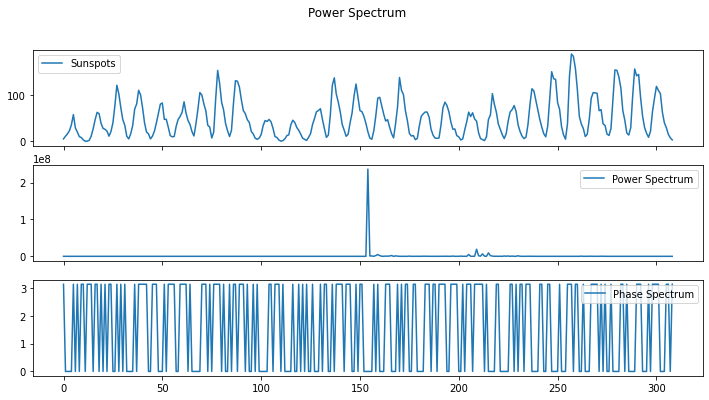

In [17]:
#create subplots
fig, axs = plt.subplots(3, figsize=(12,6), sharex=True)
fig.suptitle('Power Spectrum')
axs[0].plot(data.SUNACTIVITY.values, label="Sunspots")
axs[0].legend()
axs[1].plot(power, label="Power Spectrum")
axs[1].legend()
axs[2].plot(phase, label="Phase Spectrum")
axs[2].legend()

plt.show()